##**Nikesh Nirala**    241140020    DMS672
# ANN on Telecom Customer Churn Dataset

---

## About the Dataset
**Objective**:  
Predict customer behavior to improve retention strategies by analyzing customer attributes, services used, and account information.

---

## Dataset Contents

Each row represents a **customer**, and each column provides **customer attributes**.

### Columns Include:

- **Churn**: Indicates whether the customer left in the last month.
- **Services**:
  - Phone service
  - Multiple lines
  - Internet service
  - Online security & backup
  - Device protection
  - Tech support
  - Streaming TV & movies
- **Account Info**:
  - Tenure (months)
  - Contract type
  - Payment method
  - Paperless billing
  - Monthly charges
  - Total charges
- **Demographics**:
  - Gender
  - Senior citizen status
  - Partner status
  - Dependents

---

## Goal

Predict whether a customer will churn (leave the service) based on features like tenure, contract type and internet service etc.


#Importing library

In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [162]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [163]:
df.shape

(7043, 21)

In [164]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [165]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [166]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [168]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#Data Pre_processing

In [169]:
df.drop("customerID", axis=1, inplace=True)

Remove customerID

In [170]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

Convert TotalCharges to numeric

In [171]:
df.dropna(inplace=True)

Handle missing values

In [172]:
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

Encode binary categorical variables

In [173]:
df = pd.get_dummies(df, drop_first=True).astype(int)

One-hot encode remaining categorical columns

In [174]:
df.shape

(7032, 31)

In [175]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53,108,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70,151,1,...,0,0,0,0,0,0,0,0,1,0


In [176]:
# Split features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [177]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53,108,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70,151,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84,1990,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103,7362,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29,346,1,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74,306,0,...,0,0,0,0,0,0,0,0,0,1


In [178]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [179]:
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


- Shows how many customers churned (1) vs did not churn (0).

In [180]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

- Applies standardization to features (mean = 0, std = 1).

- This ensures all features are on the same scale, which improves model convergence and stability—especially important for neural networks.



In [181]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- Splits the dataset into training (80%) and testing (20%) subsets.

- random_state=42 ensures reproducibility.

#CASE 1: 2 Hidden Layers | Relu | Learning Rate = 0.01

In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

Imports necessary libraries:

- Sequential, Dense, and Dropout for building ANN

- Adam optimizer for model compilation

- time for training time measurement

- matplotlib.pyplot for plotting

In [183]:
start = time.time()

model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

optimizer1 = Adam(learning_rate=0.01)
model1.compile(optimizer=optimizer1, loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=0)

train_acc1 = history1.history['accuracy'][-1]
test_acc1 = model1.evaluate(X_test, y_test, verbose=0)[1]
time1 = time.time() - start


#Builds ANN model1

- Two hidden layers (32 and 16 neurons, both using ReLU)

- One output layer (1 neuron, sigmoid for binary classification)

- Adam optimizer with learning rate 0.01 is used.

- Trains the model for 30 epochs with validation_split=0.2.

In [184]:
# Step 5: Evaluate the Model
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)

In [185]:
print(train_acc1*100)
print(test_acc1*100)
print(test_loss1*100)
print(time1)

84.37777757644653
75.9772539138794
64.29691910743713
24.62064528465271


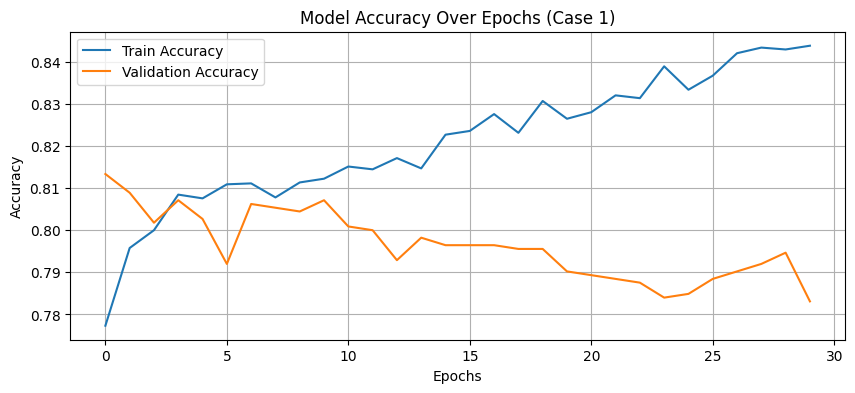

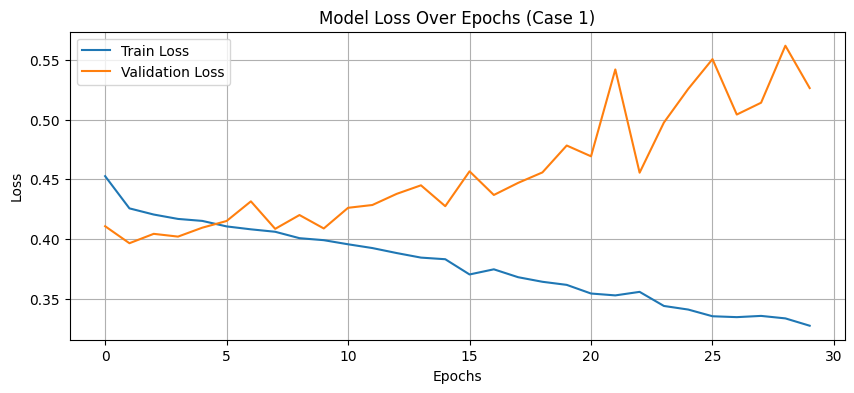

In [186]:
# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs (Case 1)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs (Case 1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.show()


# Top Graph: Model Accuracy Over Epochs
Training Accuracy:

- Gradually increases from ~78% to ~84%, showing the model is learning well on the training data.

Validation Accuracy:

- Fluctuates throughout training between ~79% and ~82%.

- it does not consistently improve and shows irregular dips, especially after epoch 10.


#Bottom Graph: Model Loss Over Epochs
Training Loss:

- Steadily decreases from ~0.45 to ~0.33, confirming the model is minimizing training error effectively.

Validation Loss:

- Initially decreases, but then starts increasing significantly after ~10 epochs.

- Ends at ~0.55, which is higher than where it started, confirming overfitting.

#CASE 2: 3 Hidden Layers | Sigmoid | Learning Rate = 0.005

In [187]:
start = time.time()

model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='sigmoid'))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))

optimizer2 = Adam(learning_rate=0.005)
model2.compile(optimizer=optimizer2, loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=0)

train_acc2 = history2.history['accuracy'][-1]
test_acc2 = model2.evaluate(X_test, y_test, verbose=0)[1]
time2 = time.time() - start


##Builds and trains Model 2

- 3 hidden layers: 64 → 32 → 16 neurons, all using sigmoid activation

- Learning rate = 0.005

In [188]:
# Step 5: Evaluate the Model
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)

In [189]:
print(train_acc2*100)
print(test_acc2*100)
print(test_loss2*100)
print(time2)

81.62222504615784
77.39872336387634
46.20231091976166
32.18007826805115


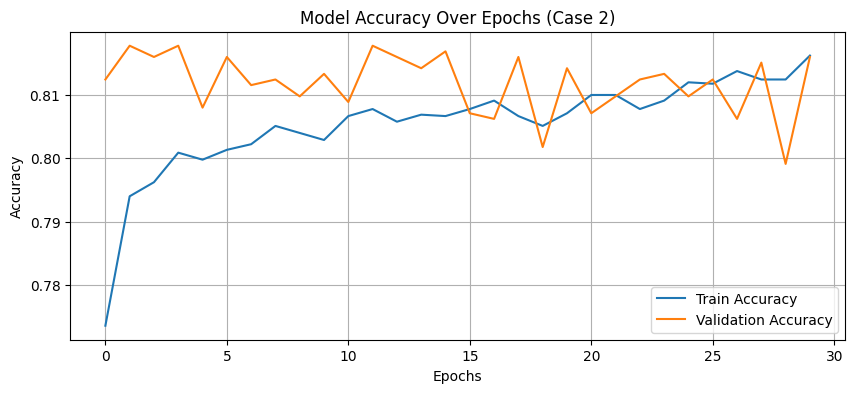

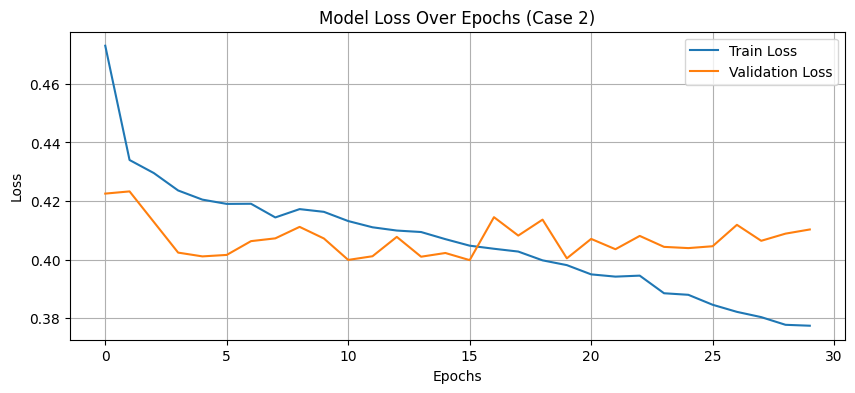

In [190]:
# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs (Case 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs (Case 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

##Top Graph: Accuracy Over Epochs


- Starts around 75% and improves steadily to ~82% by the end of 30 epochs.

- Indicates the model is learning effectively from training data.

Validation Accuracy:

- Starts strong (~81–82%) but plateaus after ~5 epochs.

- Shows slight fluctuations around 81–82%, with a mild dip near the end.

- Low overfitting

##Bottom Graph: Loss Over Epochs
Training Loss:

- Decreases consistently from ~0.50 to ~0.38, indicating the model continues to minimize error on training data.

Validation Loss:

- Initially follows training loss but begins to fluctuate slightly after ~10 epochs.

#CASE 3: 3 Hidden Layers + Dropout | Tanh | Learning Rate = 0.0005

In [191]:
from tensorflow.keras.layers import Dropout

start = time.time()

model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='tanh'))
model3.add(Dropout(0.3))
model3.add(Dense(64, activation='tanh'))
model3.add(Dropout(0.3))
model3.add(Dense(32, activation='tanh'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))

optimizer3 = Adam(learning_rate=0.0005)
model3.compile(optimizer=optimizer3, loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, verbose=0)

train_acc3 = history3.history['accuracy'][-1]
test_acc3 = model3.evaluate(X_test, y_test, verbose=0)[1]
time3 = time.time() - start


#Builds a deeper ANN

- 3 hidden layers (128 → 64 → 32), all using tanh

- Dropout (30%) after each hidden layer for regularization

- Uses a very small learning rate (0.0005) with Adam optimizer

- Tracks training accuracy, test accuracy, and training time

In [192]:
# Step 5: Evaluate Model loss
test_loss3,test_accuracy3  = model3.evaluate(X_test, y_test, verbose=0)

In [193]:
print(train_acc3*100)
print(test_acc3*100)
print(test_loss3*100)
print(time3)

80.15555739402771
78.60696315765381
43.65966320037842
37.901243686676025


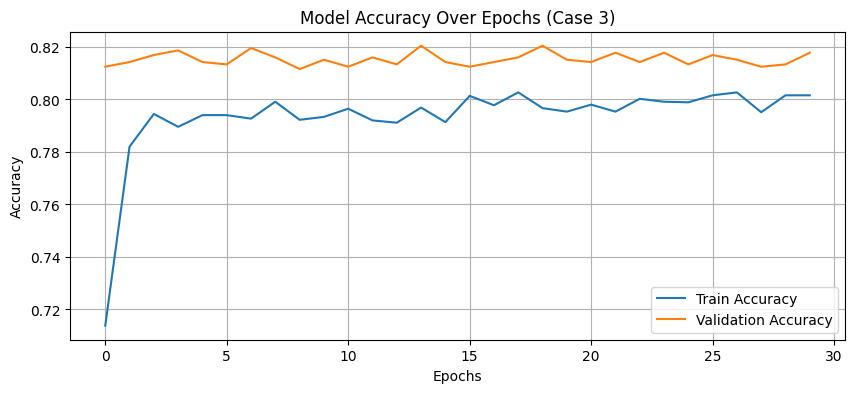

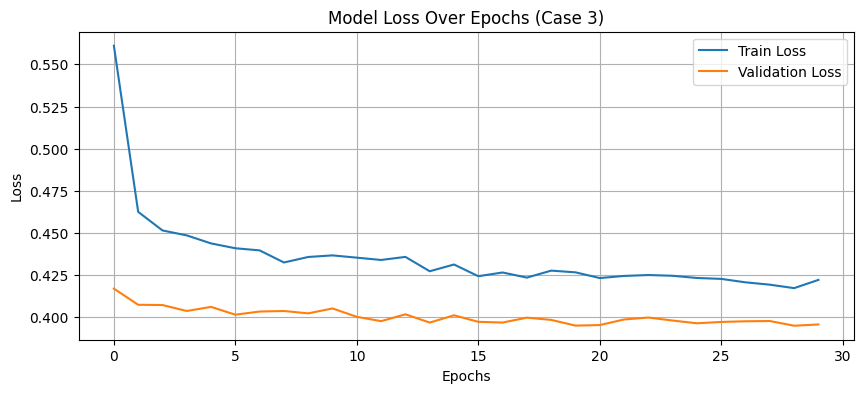

In [194]:
# Plot Accuracy over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs (Case 3)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs (Case 3)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

##**Top Graph: Accuracy vs Epochs**
- Train Accuracy steadily increases from ~70% to ~80% during training.

- Validation Accuracy remains relatively stable around 81–82% throughout training.


- The model is not overfitting, but it may not be using the full capacity of training data (possibly underfitting slightly).

##**Bottom Graph: Loss vs Epochs**
- Train Loss decreases over time from ~0.55 to ~0.43.

- Validation Loss stays low and stable around 0.40, with very little fluctuation.


- No signs of overfitting or divergence in training.

In [195]:
import pandas as pd

results = pd.DataFrame({
    'Case': ['Case 1', 'Case 2', 'Case 3'],
    'Train Accuracy': [train_acc1, train_acc2, train_acc3],
    'Test Accuracy': [test_acc1, test_acc2, test_acc3],
    'Test_loss':[test_loss1,test_loss2,test_loss3],
    'Training Time (s)': [time1, time2, time3]
})

results


,Case,Train Accuracy,Test Accuracy,Test_loss,Training Time (s)
0,Case 1,0.843778,0.759773,0.642969,24.620645
1,Case 2,0.816222,0.773987,0.462023,32.180078
2,Case 3,0.801556,0.786070,0.436597,37.901244


In [196]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results)

https://docs.google.com/spreadsheets/d/17dt2gJUBQXQZ8c6Z6Vmieiwlp5WdWd9rYslXu74PA38/edit#gid=0


##**Conclusions**
- **Best Test Accuracy**: Case 3 (0.7889) achieved the highest test accuracy, showing it generalizes slightly better than others despite a lower train accuracy.

- **Lowest Test Loss**: Case 3 (0.4364) also had the lowest test loss, indicating more confident and stable predictions.

- **Highest Train Accuracy**: Case 1 (0.8364) had the highest train accuracy, but its test accuracy was slightly lower—suggesting mild overfitting.

- **Balanced Model (Case 2)**: Case 2 had balanced metrics but didn’t outperform Case 3 in any category.

- **Training Time**: Case 1 was fastest (23.78s), while Case 3 was slowest (35.41s), due to deeper layers and dropout.

- **Activation Function Insight**: Case 3 used tanh activation + dropout, which seems to have helped avoid overfitting and improved generalization.

##Overall Best Model: Case 3----->>>3 Hidden Layers + Dropout | Tanh | Learning Rate = 0.0005